In [149]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Helper import * #some function I have created and collected from different sources
%matplotlib inline

In [151]:
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'

## Importing and Exploring The  Dataset

In [99]:
#importing the data
df = pd.read_csv('Train.csv',low_memory=False, parse_dates=['saledate'])

In [100]:
df.shape

(401125, 53)

In [101]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


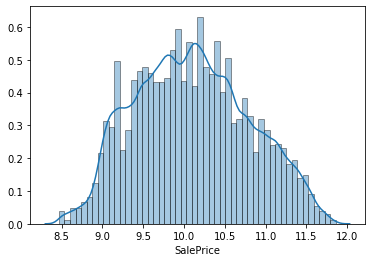

In [102]:
sns.distplot(np.log(df.SalePrice),norm_hist=True)

In [103]:
df.SalePrice = np.log(df.SalePrice)

In [104]:
numericals = is_numeric(df) #will return a list of numericals variables in the dataframe

In [105]:
missing(df[numericals])

Column SalesID is has 0.00% missing values
Column SalePrice is has 0.00% missing values
Column MachineID is has 0.00% missing values
Column ModelID is has 0.00% missing values
Column datasource is has 0.00% missing values
Column auctioneerID is has 5.02% missing values
Column YearMade is has 0.00% missing values
Column MachineHoursCurrentMeter is has 64.41% missing values


In [106]:
fill_missing(df,strategy='median') #will fill the numericals variable swith the median 

## Feature Engineering

In [107]:
add_datepart(df,'saledate') #this will create new columns related to the time series

In [108]:
display(df.head());df.shape

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


(401125, 65)

since we will proceed with a Tree Model we wont need one hot encoding, we will start with Label Encoding and check the results

In [109]:
df = LabelEncoder(df) #will encode the categorical variables into label encoding

In [110]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,1,949,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,1,1724,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,330,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,3673,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,2,4207,...,23,3,204,False,False,False,False,False,False,1248307200


In [111]:
#we will not use sklearn train test split, because we want to use the same validation set as kaggle
#the validation set will be the most recent dates

def split_vals(a,n): return a[:n].copy(), a[n:].copy()

x = df.drop('SalePrice',1)
y = df.SalePrice

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
x_train, x_valid = split_vals(x, n_trn)
y_train, y_valid = split_vals(y, n_trn)

x_train.shape, y_train.shape, x_valid.shape

((389125, 64), (389125,), (12000, 64))

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
m = RandomForestRegressor(n_estimators=40,n_jobs=-1)
m.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [120]:
print_score(m,x_train,x_valid,y_train,y_valid)

RMSE for training Data is 0.0784294712340983
RMSE for test Data is 0.23602919368591146
R2 for training Data is 0.9871443689423973
R2 for test Data is 0.9005100025978049


**the number one on leaderboard Kaggle competition has an RMSE of 0.229 , we will continue tuning and feature engineering until we beat this score**

## Hyperparameters tuning

**The difference between the RMSE from train and vaildation sets indicated that we are over fitting, max_features and min_samples_leaf are good parameters to prevent overfitting**

**tuning max_features**

In [138]:
for i in [0.5,'log2','sqrt']:
    m = RandomForestRegressor(n_estimators=40,n_jobs=-1,max_features=i)
    m.fit(x_train,y_train)
    print_score(m,x_train,x_valid,y_train,y_valid)

RMSE for training Data is 0.07677186268542686
RMSE for test Data is 0.22716817283795943
R2 for training Data is 0.9876820345454114
R2 for test Data is 0.9078398986181474
RMSE for training Data is 0.08333641390464396
RMSE for test Data is 0.26163618691687424
R2 for training Data is 0.9854854210367103
R2 for test Data is 0.8777514838999214
RMSE for training Data is 0.08120485149540231
RMSE for test Data is 0.2502485197398117
R2 for training Data is 0.9862184273441595
R2 for test Data is 0.8881615837280971


based on the results max_features = 0.5 has the lowest RMSE

**min_samples_leaf**

In [139]:
for i in [3,5,10]:
    m = RandomForestRegressor(n_estimators=40,n_jobs=-1,max_features=0.5,min_samples_leaf=i)
    m.fit(x_train,y_train)
    print_score(m,x_train,x_valid,y_train,y_valid)

RMSE for training Data is 0.11916292786925453
RMSE for test Data is 0.22867034078861784
R2 for training Data is 0.9703231940515651
R2 for test Data is 0.906617036528043
RMSE for training Data is 0.1447685870283222
RMSE for test Data is 0.2293874452755515
R2 for training Data is 0.9561990532991076
R2 for test Data is 0.9060304248782849
RMSE for training Data is 0.1747350636543984
RMSE for test Data is 0.23341639643605314
R2 for training Data is 0.9361890880811434
R2 for test Data is 0.9027004808615103


based on the results min_samples_leaf = 3 has the lowest RMSE

### Tuned Model

In [140]:
m = RandomForestRegressor(n_estimators=80,n_jobs=-1,max_features=0.5,min_samples_leaf=3)
m.fit(x_train,y_train)
print_score(m,x_train,x_valid,y_train,y_valid)

RMSE for training Data is 0.11786429678294418
RMSE for test Data is 0.2251085958676531
R2 for training Data is 0.9709665019034115
R2 for test Data is 0.9095034272559208


The tuned model has an RMSE of 0.225 vs. 0.236 for the original model. With this RMSE value **it comes first on Kaggle private leader board score**

## Feature Importance

In [141]:
fi = feature_importance(m,x_train);fi

,cols,imp
5,YearMade,0.175087
37,Coupler_System,0.114535
13,ProductSize,0.096377
14,fiProductClassDesc,0.083607
2,ModelID,0.059586
...,...,...
58,saleIs_month_start,0.000059
59,saleIs_quarter_end,0.000044
60,saleIs_quarter_start,0.000024
61,saleIs_year_end,0.000000


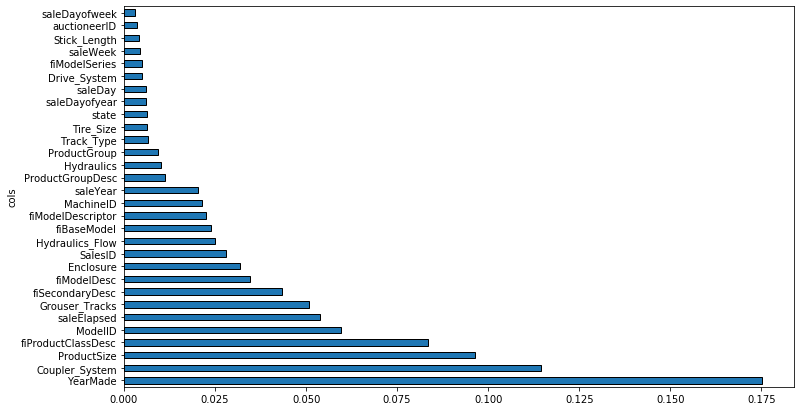

In [142]:
plot_feature_importance(fi[:30])

We will drop any feature with importance less than 0.005

In [143]:
df_keep = x[fi_to_keep(fi,0.005)]

In [144]:
df_keep.head(5)

,YearMade,Coupler_System,ProductSize,fiProductClassDesc,ModelID,saleElapsed,Grouser_Tracks,fiSecondaryDesc,fiModelDesc,Enclosure,...,saleYear,ProductGroupDesc,Hydraulics,ProductGroup,Track_Type,Tire_Size,state,saleDayofyear,saleDay,Drive_System
0,2004,-1,-1,58,3157,1163635200,-1,40,949,2,...,2006,5,0,5,-1,16,0,320,16,-1
1,1996,-1,3,61,77,1080259200,-1,54,1724,2,...,2004,5,0,5,-1,11,32,86,26,-1
2,2001,0,-1,38,7009,1077753600,0,-1,330,5,...,2004,2,3,2,-1,-1,31,57,26,-1
3,2001,-1,5,7,332,1305763200,-1,-1,3673,2,...,2011,3,0,3,-1,-1,43,139,19,-1
4,2007,0,-1,39,17311,1248307200,0,-1,4207,0,...,2009,2,3,2,-1,-1,31,204,23,-1


In [145]:
x_train, x_valid = split_vals(df_keep, n_trn)

In [147]:
m = RandomForestRegressor(n_estimators=80,n_jobs=-1,max_features=0.5,min_samples_leaf=3)
m.fit(x_train,y_train)
print_score(m,x_train,x_valid,y_train,y_valid)

RMSE for training Data is 0.12325348936348118
RMSE for test Data is 0.22272683564466694
R2 for training Data is 0.9682507644815215
R2 for test Data is 0.9114082933989595


the accuracy and RMSE has improved from 0.225 to 0.222 after removing non-important features and the overfitting has decreased

## Redundant Features

#### we will use Hierarchal Clustering to assess the colinearity between features and remove redundant variables

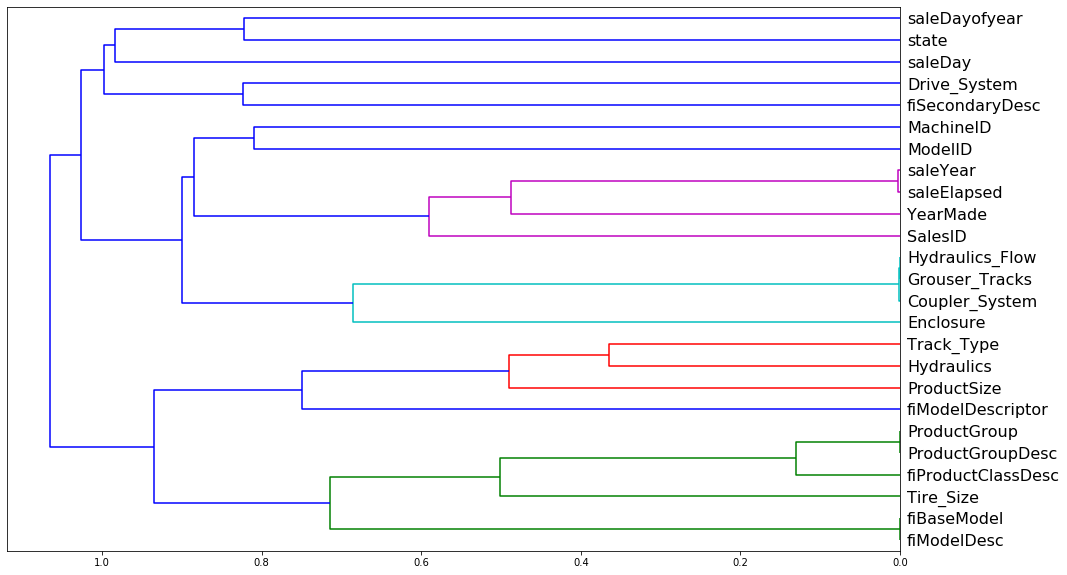

In [148]:
dendogram(df_keep)

In [153]:
#saving the engineered dataset
df_keep.to_feather('blue_keep')

we will drop the redundant features one by one and compare the out of bag score to the tuned model

In [156]:
m = RandomForestRegressor(n_estimators=80,n_jobs=-1,max_features=0.5,min_samples_leaf=3,oob_score=True)
m.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [157]:
m.oob_score_

0.9129426236843935

In [158]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [159]:
for c in ('ProductGroupDesc','ProductGroup','saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System',):
    print(c, get_oob(df_keep.drop(c, axis=1)))

ProductGroupDesc 0.9129020027946078
ProductGroup 0.9127898911023236
saleYear 0.9122854632211925
saleElapsed 0.9103665136560781
fiModelDesc 0.911929646310316
fiBaseModel 0.9121486592392477
Grouser_Tracks 0.9129231532892772
Coupler_System 0.9128460262674878


We wil drop a feature from each pair (the one that affected the OOB score less)

In [160]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks','ProductGroupDesc']
get_oob(df_keep.drop(to_drop, axis=1))

0.9114649999175894

The OOB score has only dropped slighly after removing the redundant features so we will drop them

In [167]:
to_drop = ['saleYear', 'Grouser_Tracks','ProductGroupDesc']

In [168]:
df_keep = df_keep.drop(to_drop,1)

In [169]:
x_train, x_valid = split_vals(df_keep, n_trn)

In [170]:
m = RandomForestRegressor(n_estimators=80,n_jobs=-1,max_features=0.5,min_samples_leaf=3)
m.fit(x_train,y_train)
print_score(m,x_train,x_valid,y_train,y_valid)

RMSE for training Data is 0.12326179028971793
RMSE for test Data is 0.22419260571044589
R2 for training Data is 0.9682464878166046
R2 for test Data is 0.9102384086768437


## Extrapolation

since we are doing a time series analysis using tree models, we need to make sure that there are no time dependent features in the model. the tree models are not good at extrapolation specially without gradient boosting. In order to achieve good results we will use a small trick, . we will put the test set and training set together, create a new column called is_test and see if we can predict it. If we can, we don’t have a random sample and we should remove the features that has the highest importance in predicting the training and test sets.

In [171]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0

In [175]:
x = df_ext.drop('is_valid',1)
y = df_ext.is_valid

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

1.0

since the score is 100% the model can predict the validation set so it is not random

In [180]:
fi_ext = feature_importance(m,x);fi_ext[:5]

,cols,imp
9,SalesID,0.817057
5,saleElapsed,0.137511
13,MachineID,0.032156
0,YearMade,0.004308
19,saleDayofyear,0.002222


we will drop the top 2 important features and run again

In [181]:
feats=['SalesID', 'saleElapsed']

In [182]:
x.drop(feats, axis=1, inplace=True)

In [183]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.988071050171393

the model can still predict the validation set with time dependent variables

In [184]:
fi_ext = feature_importance(m,x);fi_ext[:5]

,cols,imp
11,MachineID,0.383555
17,saleDayofyear,0.180185
16,state,0.065591
18,saleDay,0.064044
4,ModelID,0.060614


In [189]:
feats=['MachineID', 'saleDayofyear','SalesID', 'saleElapsed']

we have created a list of top features in that can predict the validation set, we will drop them one by one and see if our model is improving

In [192]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    x_train, x_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(x_train, y_train)
    print(f)
    print_score(m,x_train,x_valid,y_train,y_valid)

MachineID
RMSE for training Data is 0.12723842318084677
RMSE for test Data is 0.22151169821625072
R2 for training Data is 0.9661645947124816
R2 for test Data is 0.9123723212905758
saleDayofyear
RMSE for training Data is 0.1273489474713733
RMSE for test Data is 0.22464918222358005
R2 for training Data is 0.9661057876592811
R2 for test Data is 0.9098724308072301
SalesID
RMSE for training Data is 0.12748737143795208
RMSE for test Data is 0.2199353949289019
R2 for training Data is 0.966032063905654
R2 for test Data is 0.9136150216291646
saleElapsed
RMSE for training Data is 0.1631793851634136
RMSE for test Data is 0.2329124685482302
R2 for training Data is 0.9443499689531086
R2 for test Data is 0.9031201515773242


dropping MachineID, saleDayofyear and SalesID improves our model so we will drop them and run the model

In [193]:
feats=['MachineID', 'saleDayofyear','SalesID']

In [194]:
df_keep = df_keep.drop(feats,1)

In [195]:
x_train, x_valid = split_vals(df_keep, n_trn)

In [196]:
m = RandomForestRegressor(n_estimators=80,n_jobs=-1,max_features=0.5,min_samples_leaf=3)
m.fit(x_train,y_train)
print_score(m,x_train,x_valid,y_train,y_valid)

RMSE for training Data is 0.13820221706363234
RMSE for test Data is 0.21704227216716765
R2 for training Data is 0.9600823609930248
R2 for test Data is 0.9158727624116313


the model has improved a lot after dropping the features

## The Final Model

we will increase the number of trees, set the min_samples_leaf =1  (max_features = 0.5 had better score with min_samples_leaf = 1 and run the model

In [197]:
m = RandomForestRegressor(n_estimators=160,n_jobs=-1,max_features=0.5)
m.fit(x_train,y_train)
print_score(m,x_train,x_valid,y_train,y_valid)

RMSE for training Data is 0.0793286185981969
RMSE for test Data is 0.2112726141966258
R2 for training Data is 0.9868479149246012
R2 for test Data is 0.9202860396616543


## the RMSE of the final model is 0.211 which puts me on rank number one on Kaggle, unfortunately there is no late submission in this competition

In [199]:
fi_final = feature_importance(m,x_train);fi_final[:8]

,cols,imp
0,YearMade,0.173716
2,ProductSize,0.110707
1,Coupler_System,0.099754
5,saleElapsed,0.095413
3,fiProductClassDesc,0.076973
9,Hydraulics_Flow,0.070116
4,ModelID,0.061775
8,Enclosure,0.055391


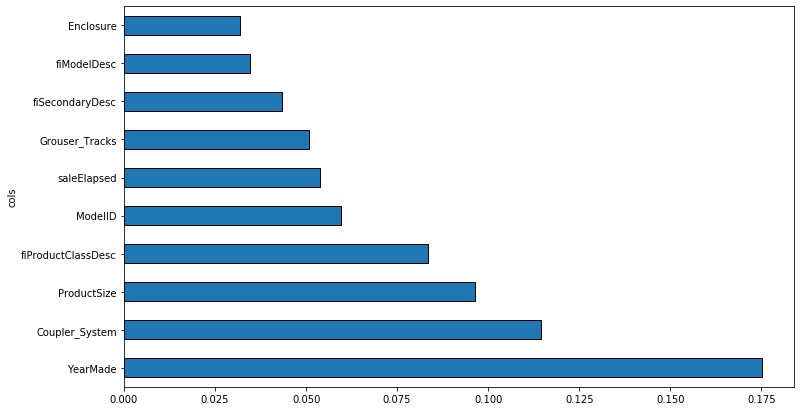

In [200]:
plot_feature_importance(fi[0:10])

we will save the final dataset to make further interpretations

In [201]:
df_keep.to_feather('Blue_Final')